In [15]:
import pandas as pd
import os
import tensorflow as tf

C:\Users\lando\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
base = "../../data/ml-data/nsq/"

dirs = [d for d in os.listdir(base) if d.endswith('.parquet')]

dfs = {}

for p in dirs:
    path = os.path.join(base, p)
    df_name = p.split('.')[0]
    dfs[df_name] = pd.read_parquet(path)

In [17]:
#print the length of every dataframe
for k in dfs:
    print(k, len(dfs[k]))

df_2022_01_1st 1231
df_2022_01_2nd 865
df_2022_02_1st 814
df_2022_02_2nd 405
df_2022_03_1st 462
df_2022_03_2nd 365
df_2022_04_1st 343
df_2022_04_2nd 552
df_2022_05_1st 286
df_2022_05_2nd 300
df_2022_06_1st 435
df_2022_06_2nd 310
df_2022_07_1st 311
df_2022_07_2nd 292
df_2022_08_1st 248
df_2022_08_2nd 382
df_2022_09_1st 309
df_2022_09_2nd 468
df_2022_10_1st 308
df_2022_10_2nd 524
df_2022_11_1st 383
df_2022_11_2nd 516
df_2022_12_1st 379
df_2022_12_2nd 864


In [18]:
i = 0
for df_name, df in dfs.items():
    print(df_name)
    first_row_body = df['body'][0]
    #show the first 5 rows of every dataframe in 'body'
    print(df['body'].head())
    print(first_row_body)
    
    
    i += 1
    if i == 1:
        break

df_2022_01_1st
0    There are two implicit parts to your question....
1    As someone who works in a pharmacy, it fucking...
2    I was diagnosed with cancer December 2019. Sur...
3    Oh my god. I'm Australian and I can't even fat...
4    “For Profit” has bled into EVERY SINGLE INDUST...
Name: body, dtype: object
There are two implicit parts to your question.  First, you're not distinguishing between the US, and each individual state in the US, and second, you're assuming that states can ban abortion but can't require vaccination.

First, each state has much greater power to regulate its citizens than the national government does.  States can require people to buy health insurance; the national government can't (and Obamacare had to be reinterpreted as a tax penalty that didn't force anyone to do anything).  States can ban alcohol; the national government can't.  The Supreme Court will be deciding whether any arm of the federal government can generally obligate vaccination, but it's u

In [34]:
from transformers import pipeline, BartTokenizer

# Init
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")

max_tokens = 512  # Reduced max tokens

summaries = {}

rows_to_sum = 10

for df_name, df in dfs.items():
    print(df_name)
    if len(df) < rows_to_sum:
        summaries[df_name] = "Number of rows is less than i"
        continue

    for i in range(0, rows_to_sum):
        #get body i 
        body_i = df['body'].iloc[i] if not df['body'].empty else None
        
        # Check for empty text
        if not body_i:
            summaries[df_name] = "Empty body text"
            continue

        # Truncate the text more aggressively
        tokens = tokenizer(body_i, truncation=True, max_length=max_tokens, return_tensors="pt")["input_ids"]
        truncated_text = tokenizer.decode(tokens[0])

        #get the length of the truncated text
        truncated_text_length = len(truncated_text)
        #dynamically resize the summary based on length of the input body
        min_len = min(int(truncated_text_length * 0.25), 80)

        # Summarize the truncated text
        summary = summarizer(truncated_text, max_length=min_len+15, min_length=min_len, do_sample=False)[0]['summary_text']
        summaries[f"{df_name}_{i}"] = summary

df_2022_01_1st
df_2022_01_2nd
df_2022_02_1st
df_2022_02_2nd
df_2022_03_1st
df_2022_03_2nd
df_2022_04_1st
df_2022_04_2nd
df_2022_05_1st
df_2022_05_2nd
df_2022_06_1st
df_2022_06_2nd
df_2022_07_1st
df_2022_07_2nd
df_2022_08_1st
df_2022_08_2nd
df_2022_09_1st
df_2022_09_2nd
df_2022_10_1st
df_2022_10_2nd
df_2022_11_1st
df_2022_11_2nd
df_2022_12_1st
df_2022_12_2nd


In [35]:
print(len(summaries))

240


In [36]:
test1_body = next(iter(dfs))

print(test1_body)

df_2022_01_1st


{'df_2022_01_1st_0': "The Supreme Court will be deciding whether any arm of the federal government can generally obligate vaccination. States can require people to buy health insurance; the national government can't. The state has an interest in prenatal life that is balanced against the health and autonomy of the mother. Basically, states *can* force people to be vaccinated, much more than they can be forced to carry a pregnancy.", 'df_2022_01_1st_1': "For-profit hospitals and offices means nurses, docs and pharmacists are often overworked and underpaid. Loopholes in patent laws means name brand drugs go decades before a generic version is made. Some hospitals charge $30 for a cough drop and a fee to hold your baby after birth. Sure, we have some great specialists here, but that doesn't make up for everything else.", 'df_2022_01_1st_2': "Cancer is a preexisting condition. Private insurances most certainly can, and do, deny you a plan when you have preexisted conditions. I had a lovely

In [37]:
test1 = next(iter(summaries))

print(dfs['df_2022_01_1st']['body'][0])

print("---Start Summary---")

print(f"{test1}: \n {summaries[test1]}")

There are two implicit parts to your question.  First, you're not distinguishing between the US, and each individual state in the US, and second, you're assuming that states can ban abortion but can't require vaccination.

First, each state has much greater power to regulate its citizens than the national government does.  States can require people to buy health insurance; the national government can't (and Obamacare had to be reinterpreted as a tax penalty that didn't force anyone to do anything).  States can ban alcohol; the national government can't.  The Supreme Court will be deciding whether any arm of the federal government can generally obligate vaccination, but it's undisputed that the state can (*see Jacobson v. Massachusetts*).

Second, *Roe v. Wade* says that the state has an interest in prenatal life that is balanced against the health and autonomy of the mother.  *Jacobson v. Massachusetts* says that the state has a compelling interest in vaccinating against contagious dis

In [38]:
#print the length of (dfs['df_2022_01_1st']['body'][0])
print(len(dfs['df_2022_01_1st']['body'][0].split()))

print(len(summaries[test1].split()))

200
67


In [43]:
#create a new dictionary for chatgpt to create refrence summary for
dfs_10 = {}

for df_name, df in dfs.items():
    i = 0
    for index, row in df.iterrows():
        if i == 10:
            break
        dfs_10[f"{df_name}_{i}"] = row['body']
        i += 1

# #print the first 5 rows of the new dictionary
# for k in dfs_10:
#     print(k)
#     print(dfs_10[k])

df_2022_01_1st_0
There are two implicit parts to your question.  First, you're not distinguishing between the US, and each individual state in the US, and second, you're assuming that states can ban abortion but can't require vaccination.

First, each state has much greater power to regulate its citizens than the national government does.  States can require people to buy health insurance; the national government can't (and Obamacare had to be reinterpreted as a tax penalty that didn't force anyone to do anything).  States can ban alcohol; the national government can't.  The Supreme Court will be deciding whether any arm of the federal government can generally obligate vaccination, but it's undisputed that the state can (*see Jacobson v. Massachusetts*).

Second, *Roe v. Wade* says that the state has an interest in prenatal life that is balanced against the health and autonomy of the mother.  *Jacobson v. Massachusetts* says that the state has a compelling interest in vaccinating again

In [44]:
# for k in summaries:
#     print(k)
#     print(summaries[k])

df_2022_01_1st_0
The Supreme Court will be deciding whether any arm of the federal government can generally obligate vaccination. States can require people to buy health insurance; the national government can't. The state has an interest in prenatal life that is balanced against the health and autonomy of the mother. Basically, states *can* force people to be vaccinated, much more than they can be forced to carry a pregnancy.
df_2022_01_1st_1
For-profit hospitals and offices means nurses, docs and pharmacists are often overworked and underpaid. Loopholes in patent laws means name brand drugs go decades before a generic version is made. Some hospitals charge $30 for a cough drop and a fee to hold your baby after birth. Sure, we have some great specialists here, but that doesn't make up for everything else.
df_2022_01_1st_2
Cancer is a preexisting condition. Private insurances most certainly can, and do, deny you a plan when you have preexisted conditions. I had a lovely social worker do

In [25]:
#show summaries size, type, and keys
print(summaries.keys())
print(type(summaries))
print(len(summaries))

dict_keys(['df_2022_01_1st', 'df_2022_01_2nd', 'df_2022_02_1st', 'df_2022_02_2nd', 'df_2022_03_1st', 'df_2022_03_2nd', 'df_2022_04_1st', 'df_2022_04_2nd', 'df_2022_05_1st', 'df_2022_05_2nd', 'df_2022_06_1st', 'df_2022_06_2nd', 'df_2022_07_1st', 'df_2022_07_2nd', 'df_2022_08_1st', 'df_2022_08_2nd', 'df_2022_09_1st', 'df_2022_09_2nd', 'df_2022_10_1st', 'df_2022_10_2nd', 'df_2022_11_1st', 'df_2022_11_2nd', 'df_2022_12_1st', 'df_2022_12_2nd'])
<class 'dict'>
24


In [52]:
#save summaries, dfs, and dfs_10 to files in ../data/ml-data/nsq/
import pickle

with open('../../data/ml-data/landon-summaries.pickle', 'wb') as handle:
    pickle.dump(summaries, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('../../data/ml-data/landon-dfs.pickle', 'wb') as handle:
    pickle.dump(dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('../../data/ml-data/landon-dfs_10.pickle', 'wb') as handle:
    pickle.dump(dfs_10, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [47]:
import os
from openai import OpenAI
api_key = os.getenv('OPENAI_API_KEY')
client = OpenAI()


In [ ]:
# from openai import OpenAI
# client = OpenAI()

# completion = client.chat.completions.create(
#     model="gpt-4",
#     response_format="json",
#     messages=[
#         {'role': 'system', 'content': 'You are a british assistant'},
#         {'role': 'user', 'content': 'Who won the world cup in 2018? And tell me 3 facts about the country that won.'}
#     ]
# )
# test_response2 = completion.choices[0].message.content
# print(test_response2)

In [49]:
response.choices[0].message.content

"The 2018 FIFA World Cup was won by France. \n\nThree facts about France are:\n\n1. France is known as the 'City of Light' because it was the first city in the world to have street lighting.\n\n2. It is the largest country in the European Union and the third largest in Europe behind Ukraine and Russia.\n\n3. France is renowned for its wine, with several renowned wine regions including Bordeaux, Burgundy, and Champagne. It is one of the world's largest wine producers."

In [64]:
def get_ref_summary(key, text):
    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{
                "role": "system",
                "content": "You are a helful assistant for summarizing text."
            }, {
                "role": "user",
                "content": f"Please summarize the following text and keep your summary near .25 of the length of the text:\n\n{text}"
            }],
        )
        gpt_summary = response.choices[-1].message.content
        return response, gpt_summary
    except Exception as e:
        print(f"Error: {e}")
        print(f'Error at key: {key}')
        return None, None

In [69]:
#get summaries for the first 10 rows of dfs_10
ref_summaries = {}
gpt_response = {}


for key, text in dfs_10.items():
    gpt_response[key], ref_summaries[key] = get_ref_summary(key, text)

In [70]:
#save the ref_summaries and gpt_response 
with open('../../data/ml-data/landon-ref_summaries.pickle', 'wb') as handle:
    pickle.dump(ref_summaries, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('../../data/ml-data/landon-gpt_response.pickle', 'wb') as handle:
    pickle.dump(gpt_response, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [71]:
#show the first 5 keys of ref_summaries
i = 0
for k in ref_summaries:
    print(k)
    print(ref_summaries[k])
    i += 1
    if i == 4:
        break



df_2022_01_1st_0
States in the US have more power to regulate their citizens than the national government. They can require health insurance and ban alcohol, while the national government cannot. The Supreme Court will determine whether the federal government can mandate vaccinations, but it is established that states have the authority to do so. The state's interest in vaccinating against contagious diseases outweighs the individual's autonomy rights. However, vaccination mandates have been avoided due to potential political backlash or violence.
df_2022_01_1st_1
Working in a pharmacy can be frustrating due to issues in privatized healthcare. Patients often experience long wait times for doctors and hospital beds, and even for their prescriptions. Insurance formularies can change unpredictably, making medication prices unstable. Healthcare professionals in for-profit settings are commonly overworked and underpaid. The high cost of certain medications, such as insulin, is a concern. Pa

In [73]:
#create a dataframe from ref_summaries and summaries
df = pd.DataFrame.from_dict(ref_summaries, orient='index', columns=['ref_summaries'])
df['summaries'] = df.index.map(summaries)
#create a 'keys' column from the index
df['keys'] = df.index
df.reset_index(drop=True, inplace=True)
df.head()

,ref_summaries,summaries,keys
0,States in the US have more power to regulate t...,The Supreme Court will be deciding whether any...,df_2022_01_1st_0
1,Working in a pharmacy can be frustrating due t...,"For-profit hospitals and offices means nurses,...",df_2022_01_1st_1
2,The author was diagnosed with cancer in Decemb...,Cancer is a preexisting condition. Private ins...,df_2022_01_1st_2
3,"The person, who is an Australian in their late...",My Medicare cost $539 TOTAL (approx $391 USD)*...,df_2022_01_1st_3
4,The text claims that the pursuit of profit has...,“For Profit” has bled into EVERY SINGLE INDUST...,df_2022_01_1st_4


In [80]:
from rouge import Rouge

rouge = Rouge()
rouge_scores = {}

for index, row in df.iterrows():
    ref_summary = row['ref_summaries']
    generated_summary = row['summaries']

    #get ROUGE scores for rouge-1, rouge-2, and rouge-l
    score_rouge_1 = rouge.get_scores(generated_summary, ref_summary)

    #store the scores using the 'keys' column in a new column called 'rouge_score'
    df.at[index, 'rouge_score_1'] = score_rouge_1[0]['rouge-1']['f']
    df.at[index, 'rouge_score_2'] = score_rouge_1[0]['rouge-2']['f']
    df.at[index, 'rouge_score_l'] = score_rouge_1[0]['rouge-l']['f']

df.head()

,ref_summaries,summaries,keys,rouge_score,rouge_score_1,rouge_score_2,rouge_score_l
0,States in the US have more power to regulate t...,The Supreme Court will be deciding whether any...,df_2022_01_1st_0,0.431034,0.431034,0.143885,0.396552
1,Working in a pharmacy can be frustrating due t...,"For-profit hospitals and offices means nurses,...",df_2022_01_1st_1,0.233577,0.233577,0.038217,0.189781
2,The author was diagnosed with cancer in Decemb...,Cancer is a preexisting condition. Private ins...,df_2022_01_1st_2,0.245902,0.245902,0.013986,0.229508
3,"The person, who is an Australian in their late...",My Medicare cost $539 TOTAL (approx $391 USD)*...,df_2022_01_1st_3,0.312500,0.312500,0.112676,0.281250
4,The text claims that the pursuit of profit has...,“For Profit” has bled into EVERY SINGLE INDUST...,df_2022_01_1st_4,0.285714,0.285714,0.071942,0.267857


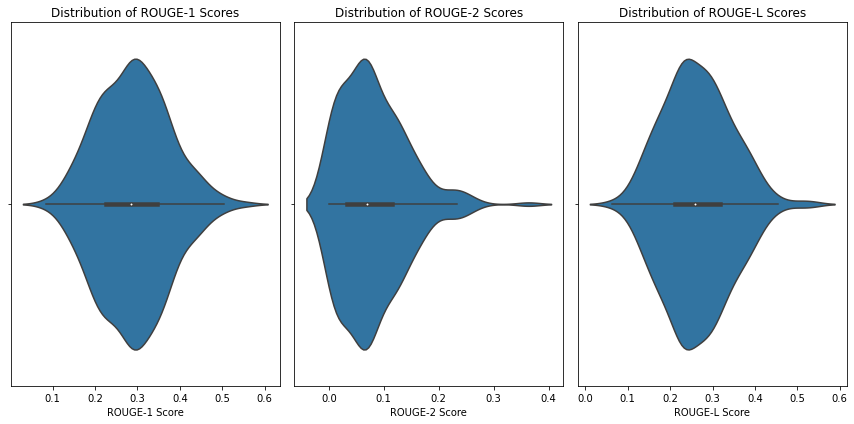

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

#create subplots for ROUGE 1,2, and L
plt.subplot(1, 3, 1)
sns.violinplot(x='rouge_score_1', data=df)
plt.xlabel('ROUGE-1 Score')
plt.title('Distribution of ROUGE-1 Scores')

plt.subplot(1, 3, 2)
sns.violinplot(x='rouge_score_2', data=df)
plt.xlabel('ROUGE-2 Score')
plt.title('Distribution of ROUGE-2 Scores')

plt.subplot(1, 3, 3)
sns.violinplot(x='rouge_score_l', data=df)
plt.xlabel('ROUGE-L Score')
plt.title('Distribution of ROUGE-L Scores')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [82]:
#code for processing data was adapted with assistance from ChatGPT